# Visualización geoespacial del dataset

En esta sección vamos a visualizar la información que nos brinda el dataset, aprovechando las columnas 'lat' y 'lon' que nos da la latitud y la longitud de cada inmueble. Para ello, haremos uso de la libería geopandas y bokeh, que nos permitirán ver en el mapa cada elemento del dataset, y ver algunas de sus magnitudes.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df_properatti = pd.read_csv("../properatti.csv", encoding ='latin-1')
df_properatti.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


## Mapa de Argentina

De la librería de geopandas, podemos obtener el mapa de la argentina, y plotear ahí mismo los puntos geográficos de cada inmueble.

<AxesSubplot:>

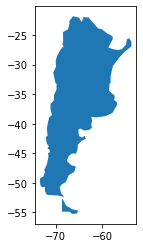

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
argentina = world[world['name'] == 'Argentina']
argentina.plot()

Text(0.5, 1.0, 'Geolocalización Properatti')

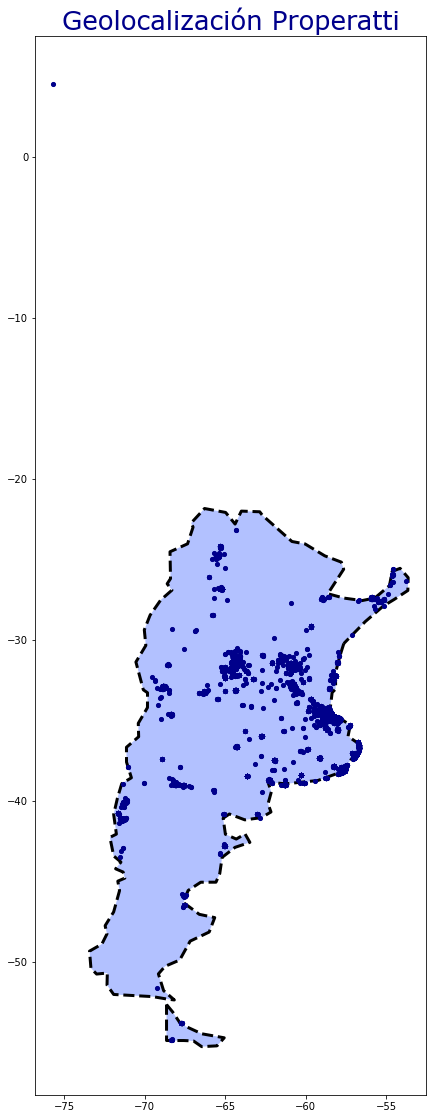

In [4]:
geo_properatti = gpd.GeoDataFrame(df_properatti, geometry=gpd.points_from_xy(df_properatti.lon, df_properatti.lat))

fig, ax = plt.subplots(figsize = (7,20))
argentina.plot(ax = ax, edgecolor = "black", facecolor=(0,0.2,1,0.3), linewidth = 3, linestyle='dashed')
geo_properatti.plot(ax = ax, color = 'darkblue', markersize = 17)
# plt.axis('off')
plt.title("Geolocalización Properatti", fontdict = {'family': 'Verdana','color':  'darkblue', 'weight': 'normal', 'size': 26})
# plt.savefig('Argentina.png')

Con este simple gráfico, podemos observar que existe un elemento del dataset que se encuentra fuera del territorio argentino, cuando habíamos estudiado previamente que todos pertenecían dentro del país. Podemos eliminarlo simplemente del dataset con una máscara, viendo que el punto pertenece a una latitud mayor a cero (por encima de la línea del ecuador).

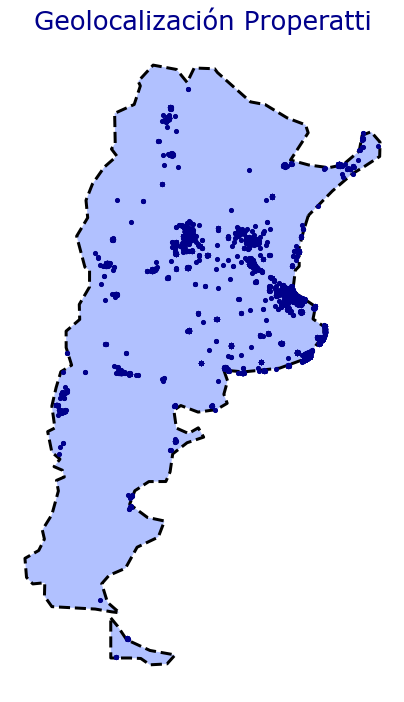

In [5]:
geo_properatti = geo_properatti[geo_properatti.lat < 0]

fig, ax = plt.subplots(figsize = (7,20))
argentina.plot(ax = ax, edgecolor = "black", facecolor=(0,0.2,1,0.3), linewidth = 3, linestyle='dashed')
geo_properatti.plot(ax = ax, color = 'darkblue', markersize = 17)
plt.axis('off')
plt.title("Geolocalización Properatti", fontdict = {'family': 'Verdana','color':  'darkblue', 'weight': 'normal', 'size': 26})
plt.savefig('plots/Argentina.png')

De esta simple manera, podemos visualizar la distribución y los puntos de concentración de los inmuebles en venta, con mayor participación en las provincias de Buenos Aires, Rosario y Córdoba. 

# Visualización de algunas magnitudes

Mediante la herramienta Bokeh, podremos observar también algunas magnitudes de los inmuebles, como por ejemplo su precio en usd por $m^2$. 

A partir de este momento trabajaremos con el dataset final ordenado, para eliminar algunos valores outliers que puedan entorpecer la correcta visualización geográfica. 

In [6]:
from bokeh.io import show, save
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [7]:
def getPolyCoords(row, geom, coord_type):
    '''
    En esta función, pasamos el polygon y retorna las componentes en 'x' o en 'y' según 
    se solicite.
    '''
    if coord_type == 'x':
        return list(row[geom].exterior.coords.xy[0])
    elif coord_type == 'y':
        return list(row[geom].exterior.coords.xy[1])
def plot_in_map(df, column = 'price_aprox_usd', resize = 1, info = 'place_name', title = 'Properatti by place', color = 'blue'):
    '''
    Esta función realiza un plot geográfico en el mapa de la Argentina.
    df: Dataframe con toda la información, las coordenadas de latitus y longitud deben estar en las columnas 'lat' y 'lon' respectivamente.
    column: Variable cuya magnitud quiere ser visualizada en el mapa. Los radios de circunferencias dependerán proporcionalmente a su valor.
    resize: Factor por el que se quiere multiplicar los radios de circunferencia
    info: Alguna información extra que se quiera agregar, generalmente guardado para la localidad.
    title: Título del plot.
    color: Colores de las circunferencias.
    '''
    
    plot_argentina = figure(title = title, height = 500, width = 300)
    plot_argentina.patches('x', 'y', source = ColumnDataSource(source_argentina), line_color = "black", line_width = 3, color = 'white')
    
    # Filtramos el elemento que se encontraba fuera del territorio argentino
    df_properatti_copy = df.copy()
    # Obtenemos el máximo precio obtenido en el Dataset y definimos el radio
    # para el plot
    maximum = df_properatti_copy[column].max()
    df_properatti_copy['radius'] = resize * df_properatti_copy[column] / maximum

    # Creamos el objeto con la información necesaria para el plot
    source_properatti = ColumnDataSource(data = df_properatti_copy[['lat', 'lon', column, 'radius']])
    # Plotemos cada inmueble con toda su información
    plot_argentina.circle(x = 'lon', y = 'lat', source = source_properatti, radius = 'radius', color = color, alpha=0.5)

    # Mediante HoverTool, agregamos los datos que nos interesan del dataset
    hover = HoverTool(tooltips=[("(x,y)", "($x, $y)"),(f"{column}", f'@{column}'),(f"{info}", f"@{info}")])
    plot_argentina.add_tools(hover)

    # El archivo html se guardará en la carpetar 'plots'
    save(plot_argentina,f"plots/Argentina_{title}.html")
    # export_png(plot_argentina, filename=f"plots/Argentina_{title}.png")
    # show(plot_argentina)
    return plot_argentina    


In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
argentina = world[world['name'] == 'Argentina']

# En la siguiente línea de codigo, mediante la función explode lograremos dividir los Multipolygon en la columna
# 'geometry', en varias filas del tipo simple polygon
argentina_exp = argentina.copy()
argentina_exp = argentina.explode(ignore_index = True)

# Descomponemos cada polygon en argentina_exp en todos los pares 'x' e 'y'.
# De esta manera, podemos transformar el dataset en un ColumnDataSource válido
# y así ser ploteado mendiante la librería bokeh
argentina_exp['x'] = argentina_exp.apply(getPolyCoords, geom = 'geometry', coord_type = 'x', axis = 1)
argentina_exp['y'] = argentina_exp.apply(getPolyCoords, geom = 'geometry', coord_type = 'y', axis = 1)
source_argentina = argentina_exp.drop('geometry', axis = 1).copy()


In [9]:
properatti_tidy = pd.read_csv('df_price_surface_place_tidy.csv')
df_properatti_byplace_type = pd.DataFrame()

# Agrupamos por localidad y por tipo de propiedad
df_properatti_byplace_type['price_aprox_usd'] = properatti_tidy.groupby(by = ['place', 'property_type'])['price_aprox_usd'].mean()
df_properatti_byplace_type['price_usd_per_m2'] = properatti_tidy.groupby(by = ['place', 'property_type'])['price_usd_per_m2'].mean()
df_properatti_byplace_type['surface_covered_in_m2'] = properatti_tidy.groupby(by = ['place', 'property_type'])['surface_covered_in_m2'].mean()
# Para las latitudes y longitudes conviene tomar la mediana en vez de la media, para evitar pérdida de precisión por los outliers
df_properatti_byplace_type['lat'] = properatti_tidy.groupby(by = ['place', 'property_type'])['lat'].median()
df_properatti_byplace_type['lon'] = properatti_tidy.groupby(by = ['place', 'property_type'])['lon'].median()
df_properatti_byplace_type.reset_index(level = [1], inplace = True)
df_properatti_byplace_type

,property_type,price_aprox_usd,price_usd_per_m2,surface_covered_in_m2,lat,lon
place,,,,,,
Argentina|Bs.As. G.B.A. Zona Norte|Escobar,PH,143577.307500,1704.582617,75.625000,-34.447220,-58.788266
Argentina|Bs.As. G.B.A. Zona Norte|Escobar,apartment,122757.759907,1652.412673,59.532710,-34.396659,-58.743479
Argentina|Bs.As. G.B.A. Zona Norte|Escobar,house,266507.563700,1056.066406,186.935506,-34.355559,-58.761296
Argentina|Bs.As. G.B.A. Zona Norte|Escobar,store,85233.333333,2253.300138,40.333333,-34.380721,-58.746595
Argentina|Bs.As. G.B.A. Zona Norte|General San Martín,PH,100787.148594,1060.229421,81.285141,-34.566837,-58.552295
...,...,...,...,...,...,...
Argentina|Tucumán|San Miguel de Tucumán,apartment,112862.717353,1203.112398,71.000000,-26.819776,-65.201596
Argentina|Tucumán|San Miguel de Tucumán,house,218726.330000,1093.631650,200.000000,NaN,NaN
Argentina|Tucumán|San Miguel de Tucumán,store,70000.000000,875.000000,80.000000,-26.818956,-65.230747


In [10]:
# Creamos los plot para cada tipo de propiedad. En este caso compareremos los precios en usd por m2, pero notar que en la variable 'column'
# de la función podemos pasar otras columnas como el precio total o la superficie cubierta en m2.

house = plot_in_map(df_properatti_byplace_type[df_properatti_byplace_type['property_type'] == 'house'], info = 'place', title = 'Properatti by place - House',
                         color = brewer['Dark2'][4][0], column = 'price_usd_per_m2')
PH = plot_in_map(df_properatti_byplace_type[df_properatti_byplace_type['property_type'] == 'PH'], info = 'place', title = 'Properatti by place - PH',
                         color = brewer['Dark2'][4][1], column = 'price_usd_per_m2')
store = plot_in_map(df_properatti_byplace_type[df_properatti_byplace_type['property_type'] == 'store'], info = 'place', title = 'Properatti by place - store',
                         color = brewer['Dark2'][4][2], column = 'price_usd_per_m2')
apartment = plot_in_map(df_properatti_byplace_type[df_properatti_byplace_type['property_type'] == 'apartment'], info = 'place', title = 'Properatti by place - apartment',
                         color = brewer['Dark2'][4][3], column = 'price_usd_per_m2')

C:\Users\matif\anaconda3\envs\tpn1\lib\site-packages\bokeh\io\saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\matif\anaconda3\envs\tpn1\lib\site-packages\bokeh\io\saving.py:154: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")
C:\Users\matif\anaconda3\envs\tpn1\lib\site-packages\bokeh\io\saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\matif\anaconda3\env

In [11]:
show(house)
show(PH)
show(store)
show(apartment)

De esta manera, podemos comparar de una manera más visual las diferencias entre las magnitudes de precios por $m^2$ según su ubicación geográfica.


# Mediana del precio por metro cuadrado por provincia

En la siguiente sección buscaremos visualizar en el mapa de la argentina las mediana de los precios por metro cuadrado.

In [12]:
## En el siguiente archivo zip, se encuentra el archivo .shp oficial de la república argentina con la división política de las
## provincias

zipfile = "provincias.zip!provincias"
provincias = gpd.read_file(zipfile)
## Modificamos algunas columnas para el matching con nuestro dataset
provincias.at[16,'NAM'] = 'Tierra Del Fuego'
provincias.at[0,'NAM'] = 'Capital Federal'
df_properatti = properatti_tidy.copy()
provincias.set_index('NAM', inplace = True)
provincias

,OBJECTID,Entidad,Objeto,FNA,GNA,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
NAM,,,,,,,,,,,
Capital Federal,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,IGN,Geografía,02,0.020242,0.743806,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
Neuquén,428,0,Provincia,Provincia del Neuquén,Provincia,IGN,Geografía,58,9.771811,21.515985,"POLYGON Z ((-70.39345 -36.15526 0.00000, -70.3..."
La Pampa,429,0,Provincia,Provincia de La Pampa,Provincia,IGN,Geografía,42,14.553019,19.665614,"MULTIPOLYGON Z (((-64.76547 -40.78351 0.00000,..."
Mendoza,430,0,Provincia,Provincia de Mendoza,Provincia,IGN,Geografía,50,14.658388,23.259986,"POLYGON Z ((-69.12570 -32.00283 0.00000, -69.1..."
San Luis,431,0,Provincia,Provincia de San Luis,Provincia,IGN,Geografía,74,7.333771,14.490196,"POLYGON Z ((-67.05547 -31.85605 0.00000, -67.0..."
Córdoba,432,0,Provincia,Provincia de Córdoba,Provincia,IGN,Geografía,14,15.748328,18.453115,"POLYGON Z ((-63.87035 -29.62387 0.00000, -63.8..."
Santa Fe,433,0,Provincia,Provincia de Santa Fe,Provincia,IGN,Geografía,82,12.552838,20.852280,"POLYGON Z ((-60.27271 -33.26386 0.00000, -60.2..."
Entre Ríos,434,0,Provincia,Provincia de Entre Ríos,Provincia,IGN,Geografía,30,7.486487,14.359091,"POLYGON Z ((-58.58138 -30.16010 0.00000, -58.5..."
San Juan,435,0,Provincia,Provincia de San Juan,Provincia,IGN,Geografía,70,8.328441,19.445606,"POLYGON Z ((-69.62981 -28.39369 0.00000, -69.6..."


In [13]:
## limpieza de tildes del dataset y agrupación de provincias de Buenos Aires
df_properatti.replace('Bs.As. G.B.A. Zona Sur', 'Buenos Aires', inplace = True)
df_properatti.replace('Bs.As. G.B.A. Zona Norte', 'Buenos Aires', inplace = True)
df_properatti.replace('Buenos Aires Costa Atlántica', 'Buenos Aires', inplace = True)
df_properatti.replace('Bs.As. G.B.A. Zona Oeste', 'Buenos Aires', inplace = True)
df_properatti.replace('Buenos Aires Interior', 'Buenos Aires', inplace = True)
df_properatti.replace('CÃ³rdoba', 'Córdoba', inplace = True)
df_properatti.replace('RÃ­o Negro', 'Río Negro', inplace = True)
df_properatti.replace('NeuquÃ©n', 'Neuquén', inplace = True)
df_properatti.replace('TucumÃ¡n', 'Tucumán', inplace = True)

df_properatti['state_name'].value_counts()

Buenos Aires           45121
Capital Federal        25582
Córdoba                 4627
Santa Fe                4506
Corrientes               415
Mendoza                  333
Neuquén                  259
Río Negro                197
Misiones                 189
San Luis                 138
Entre Ríos                91
Tucumán                   85
Salta                     58
Chubut                    43
Chaco                     27
Tierra Del Fuego          20
La Pampa                  19
Santa Cruz                 9
Jujuy                      9
Catamarca                  8
San Juan                   4
Santiago Del Estero        1
La Rioja                   1
Name: state_name, dtype: int64

In [14]:
df_properatti.columns

Index(['Unnamed: 0', 'property_type', 'place_name', 'place_with_parent_names',
       'state_name', 'lat-lon', 'lat', 'lon', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'description', 'title',
       'place'],
      dtype='object')

In [15]:
## Agregamos la columna de nuestro dataset agrupado por provincia
provincias['price_per_m2'] =  df_properatti.groupby(by = ['state_name'])['price_usd_per_m2'].median()
provincias = provincias.explode(ignore_index = True)
df_properatti.groupby(by = ['state_name'])['price_usd_per_m2'].median().sort_values()

state_name
Santiago Del Estero      72.000000
Jujuy                   287.742900
Catamarca               471.857837
Misiones                525.245142
San Luis                526.315789
Santa Cruz              565.744892
Tucumán                 785.171463
Entre Ríos              800.000000
Tierra Del Fuego        839.302199
La Pampa                855.936328
Chaco                   953.086218
Córdoba                1037.548000
Salta                  1091.897685
Mendoza                1439.285714
Corrientes             1461.538462
Buenos Aires           1550.000000
Santa Fe               1577.353125
San Juan               1648.244241
Chubut                 1766.666667
Neuquén                1854.379597
Río Negro              2305.836149
Capital Federal        2472.222222
La Rioja                       NaN
Name: price_usd_per_m2, dtype: float64

In [16]:
## Ploteo con Geopandas y Bokeh

def getPolyCoords(row, geom, coord_type):
    if coord_type == 'x':
        return list(row[geom].exterior.coords.xy[0])
    elif coord_type == 'y':
        return list(row[geom].exterior.coords.xy[1])

geo_provincias = figure(title = "Geolocalización Properatti", height = 1000, y_range=(-60,-20), x_range = (-80,-50))
geo_provincias_source = provincias.copy()
geo_provincias_source['x'] = geo_provincias_source.apply(getPolyCoords, geom = 'geometry', coord_type = 'x', axis = 1)
geo_provincias_source['y'] = geo_provincias_source.apply(getPolyCoords, geom = 'geometry', coord_type = 'y', axis = 1)
geo_provincias_source.drop(columns = 'geometry', inplace = True)
geo_provincias_source

,OBJECTID,Entidad,Objeto,FNA,GNA,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,price_per_m2,x,y
0,447,0,Provincia,Provincia de Buenos Aires,Provincia,IGN,Geografía,06,30.805998,34.035576,1550.000000,"[-60.272374990999936, -60.27206582399998, -60....","[-33.26348632899993, -33.263460658999975, -33...."
1,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,IGN,Geografía,02,0.020242,0.743806,2472.222222,"[-58.34188739699994, -58.342397275999986, -58....","[-34.631096716999934, -34.63127918799995, -34...."
2,437,0,Provincia,Provincia de Catamarca,Provincia,IGN,Geografía,10,9.256945,21.706082,471.857837,"[-68.10861958199996, -68.10149545999997, -68.0...","[-25.211782720999963, -25.212559815999953, -25..."
3,440,0,Provincia,Provincia del Chaco,Provincia,IGN,Geografía,22,9.024889,19.239419,953.086218,"[-62.24919160899998, -62.24467063299994, -62.2...","[-24.140751786999942, -24.141703571999983, -24..."
4,445,0,Provincia,Provincia del Chubut,Provincia,IGN,Geografía,26,25.085834,38.837945,1766.666667,"[-66.69851684599996, -66.69920349099993, -66.6...","[-45.247474669999974, -45.24748992899998, -45...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,443,0,Provincia,"Provincia de Tierra del Fuego, Antártida e Isl...",Provincia,IGN,Geografía,94,566.267612,749.983159,839.302199,"[-60.64176244399994, -60.642654741999934, -60....","[-52.21296735399994, -52.21302683999994, -52.2..."
1523,443,0,Provincia,"Provincia de Tierra del Fuego, Antártida e Isl...",Provincia,IGN,Geografía,94,566.267612,749.983159,839.302199,"[-61.454563673999985, -61.45490172899997, -61....","[-51.001054400999976, -51.00125159999993, -51...."
1524,443,0,Provincia,"Provincia de Tierra del Fuego, Antártida e Isl...",Provincia,IGN,Geografía,94,566.267612,749.983159,839.302199,"[-58.34942712299994, -58.35004128899993, -58.3...","[-51.437692262999974, -51.43787918299995, -51...."
1525,443,0,Provincia,"Provincia de Tierra del Fuego, Antártida e Isl...",Provincia,IGN,Geografía,94,566.267612,749.983159,839.302199,"[-64.34947785699995, -64.34985857099997, -64.3...","[-54.84396283499996, -54.844438726999954, -54...."


In [17]:
## Selección de paleta y criterio para los colores

palette = brewer['Reds'][8]
palette = palette[::-1]

vals = geo_provincias_source['price_per_m2']

color_mapper = LinearColorMapper(palette = palette, low = vals.min(), high = vals.max())
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20, location=(0,0), orientation='horizontal')


geo_provincias.patches(xs = 'x', ys = 'y', source = geo_provincias_source, color = 'color', line_color = 'black',
                      fill_color={'field' :'price_per_m2' , 'transform': color_mapper})
hover = HoverTool(tooltips=[("index", "$index"),("Provincia", "@FNA")])
geo_provincias.add_tools(hover)

geo_provincias.add_layout(color_bar, 'below')

show(geo_provincias)
save(geo_provincias, 'plots/precio_por_m2_mediana_provincia.html')

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "hatch_color" value "color" [renderer: GlyphRenderer(id='2446', ...)]
C:\Users\matif\anaconda3\envs\tpn1\lib\site-packages\bokeh\io\saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\matif\anaconda3\envs\tpn1\lib\site-packages\bokeh\io\saving.py:154: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to none

'G:\\Mi unidad\\Data Science DH\\TP N1\\Entrega Trabajo\\Visualización geográfica del Dataset\\plots\\precio_por_m2_mediana_provincia.html'